# 3 Linear Regression

In [1]:
import linear_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
import sys
sys.version

'3.9.7 (default, Sep  9 2021, 23:20:13) \n[GCC 9.3.0]'

In [3]:
%matplotlib inline
plt.style.use('seaborn-white')

## 3.1 Simple Linear Regression

In [4]:
advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:xlabel='TV', ylabel='sales'>

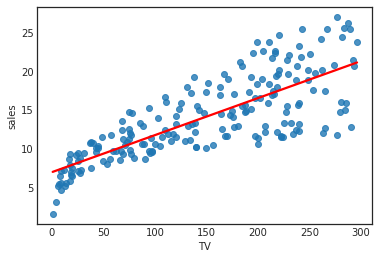

In [5]:
sns.regplot(data=advertising, y="sales", x="TV", ci=None, line_kws=dict(color="red"))

In [6]:
est = smf.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [7]:
pd.DataFrame(
    {"Value": [np.sqrt(est.mse_resid/est.df_model), est.rsquared, est.fvalue]},
    index=["Residual standard error", "R2", "F-statistic"]
).round(2)

,Value
Residual standard error,3.26
R2,0.61
F-statistic,312.14


## 3.2 Multiple Linear Regression

In [8]:
est = smf.ols('sales ~ TV', advertising).fit()
display(est.summary().tables[1])

est = smf.ols('sales ~ radio', advertising).fit()
display(est.summary().tables[1])

est = smf.ols('sales ~ newspaper', advertising).fit()
display(est.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [9]:
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
display(est.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
radio,0.1885,0.009,21.893,0.000,0.172,0.206
newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


In [10]:
advertising.corr().style.background_gradient(cmap='coolwarm').format(precision=3)

,TV,radio,newspaper,sales
TV,1.000,0.055,0.057,0.782
radio,0.055,1.000,0.354,0.576
newspaper,0.057,0.354,1.000,0.228
sales,0.782,0.576,0.228,1.000


In [11]:
pd.DataFrame(
    {"Value": [np.sqrt(est.mse_resid/(est.df_model-2)), est.rsquared, est.fvalue]},
    index=["Residual standard error", "R2", "F-statistic"]
).round(2)

,Value
Residual standard error,1.69
R2,0.90
F-statistic,570.27


## 3.3 Other Considerations in the Regression Model

### 3.3.1 Qualitative Predictors

In [12]:
credit = pd.read_csv('Data/Credit.csv')
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580


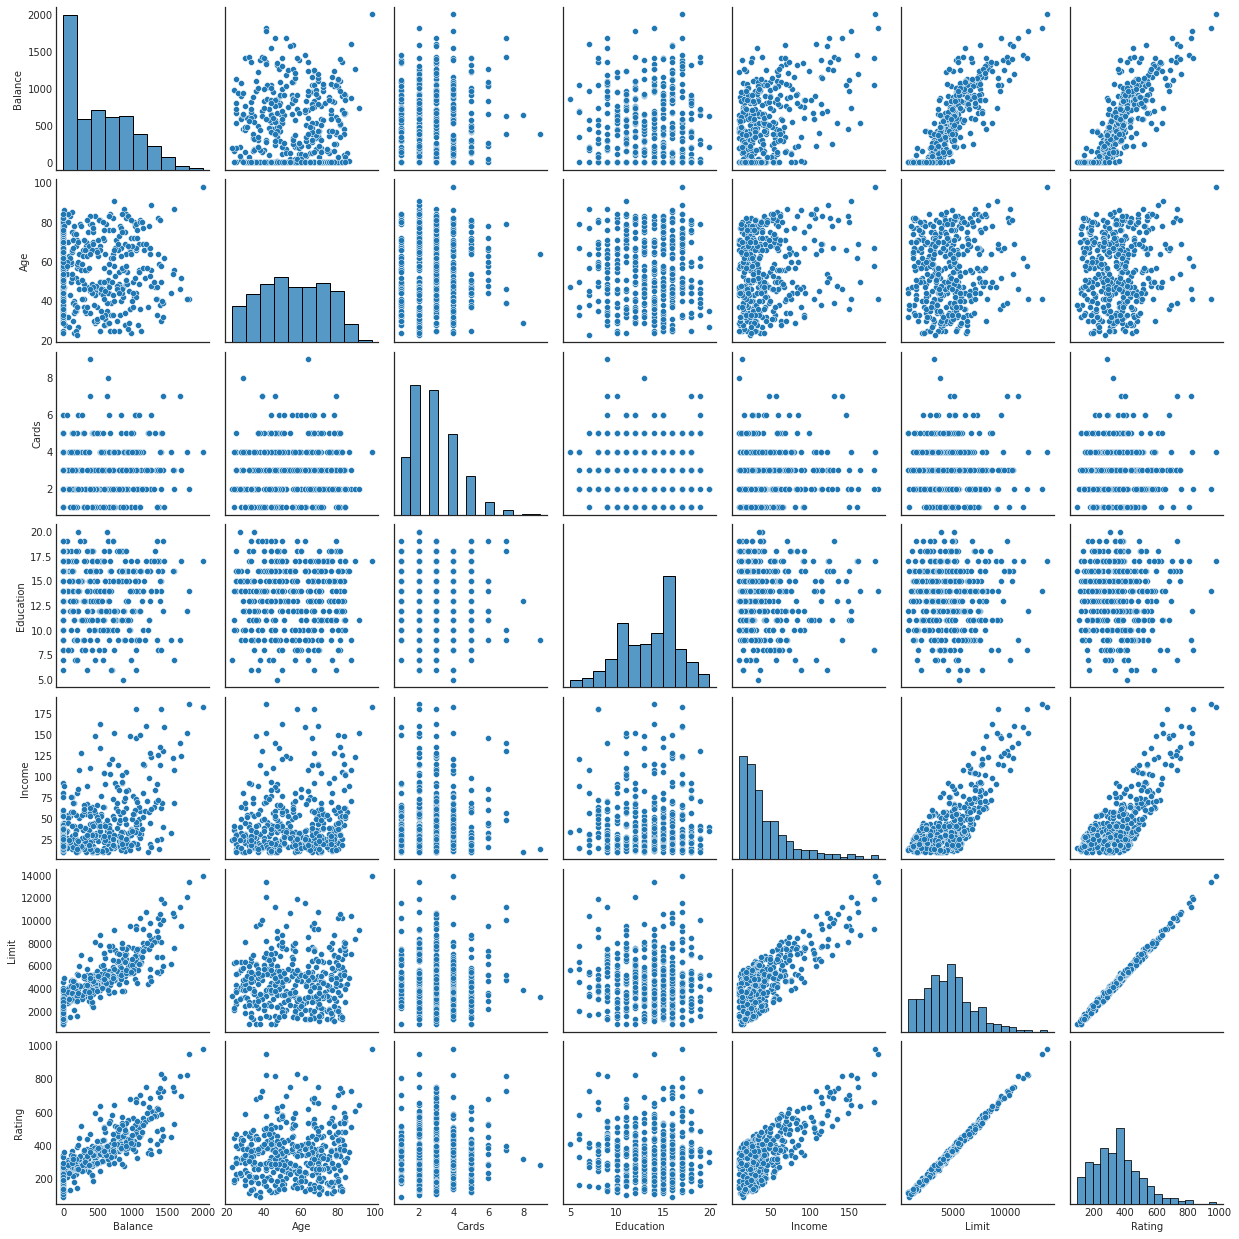

In [13]:
sns.pairplot(credit[['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating']]);

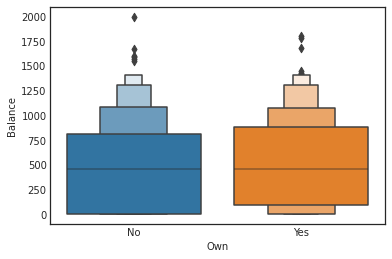

In [14]:
sns.boxenplot(data=credit, y="Balance", x="Own");

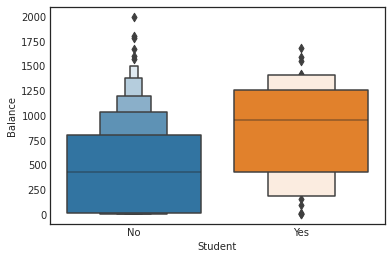

In [15]:
sns.boxenplot(data=credit, y="Balance", x="Student");

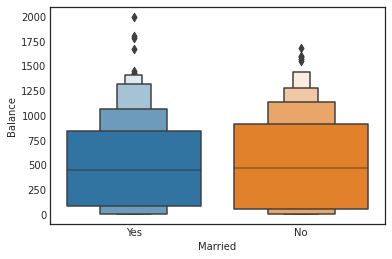

In [16]:
sns.boxenplot(data=credit, y="Balance", x="Married");

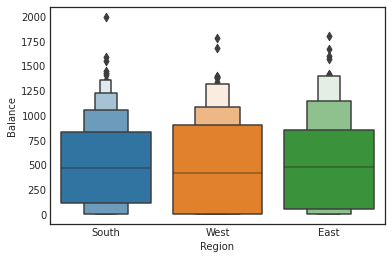

In [17]:
sns.boxenplot(data=credit, y="Balance", x="Region");

#### Qualitative Predictors with Only Two Levels

In [18]:
est = smf.ols('Balance ~ Own', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Own[T.Yes],19.7331,46.051,0.429,0.669,-70.801,110.267


In [19]:
est = smf.ols('Balance ~ C(Own, Sum)', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,519.6697,23.026,22.569,0.000,474.403,564.937
"C(Own, Sum)[S.No]",-9.8666,23.026,-0.429,0.669,-55.134,35.400


#### Qualitative Predictors with More than Two Levels

In [20]:
# ensure the reference level is East
est = smf.ols('Balance ~ C(Region, Treatment("East"))', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
"C(Region, Treatment(""East""))[T.South]",-12.5025,56.681,-0.221,0.826,-123.935,98.930
"C(Region, Treatment(""East""))[T.West]",-18.6863,65.021,-0.287,0.774,-146.515,109.142


In [21]:
est.f_pvalue

0.9574918881199579

### 3.3.2 Extensions of the Linear Model

#### Removing the Additive Assumption

In [22]:
est = smf.ols('sales ~ TV + radio + TV*radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [23]:
est_linear = smf.ols('Balance ~ Income + Student', credit).fit()
est_interaction = smf.ols('Balance ~ Income * Student', credit).fit()

<AxesSubplot:xlabel='Income'>

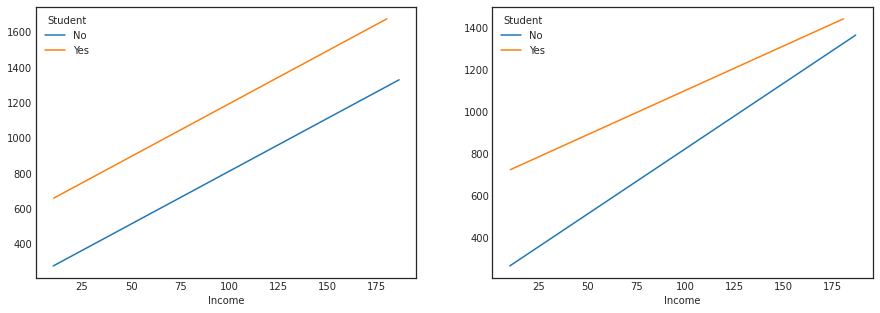

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.lineplot(x=credit.Income, y=est_linear.fittedvalues, hue=credit.Student, ax=ax1)
sns.lineplot(x=credit.Income, y=est_interaction.fittedvalues, hue=credit.Student, ax=ax2)

#### Non-linear Relationships

In [25]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [26]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [27]:
est = smf.ols('mpg ~ horsepower + np.power(horsepower, 2)', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
"np.power(horsepower, 2)",0.0012,0.000,10.080,0.000,0.001,0.001


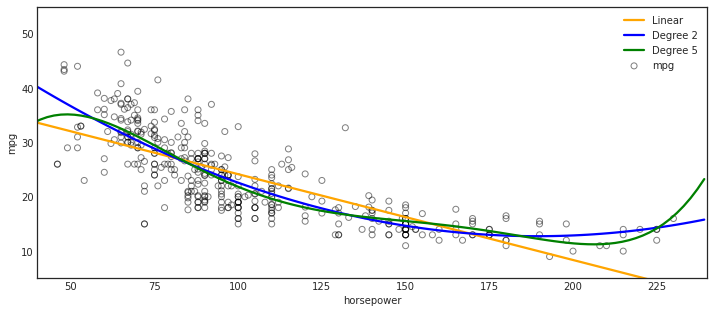

In [28]:
plt.figure(figsize=(12,5))
common_config = dict(ci=None, truncate=False, scatter=False)
plt.scatter(data=auto, x="horsepower", y="mpg", facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(data=auto, x="horsepower", y="mpg", label='Linear', color='orange', **common_config)
sns.regplot(data=auto, x="horsepower", y="mpg", label='Degree 2', order=2, color='blue', **common_config)
sns.regplot(data=auto, x="horsepower", y="mpg", label='Degree 5', order=5, color='g', **common_config)
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

### 3.3.3 Potential Problems

#### 1. Non-linearity of the Data

In [29]:
model_linear = smf.ols('mpg ~ horsepower', auto).fit()
model_quad = smf.ols('mpg ~ horsepower + np.power(horsepower, 2)', auto).fit()

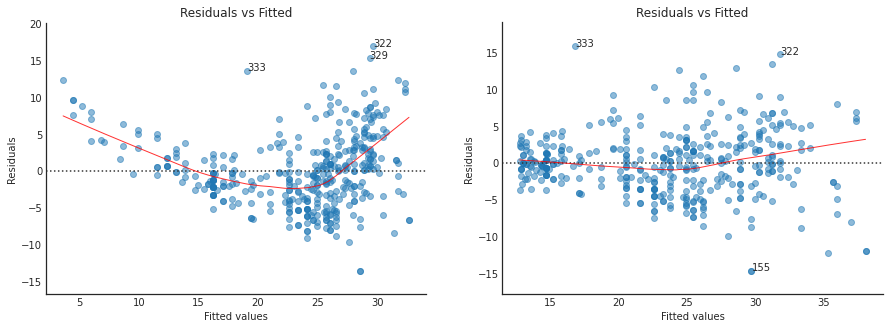

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
linear_regression.residuals_vs_fitted(model_linear, ax=ax1)
linear_regression.residuals_vs_fitted(model_quad, ax=ax2)

#### 2. Correlation of Error Terms

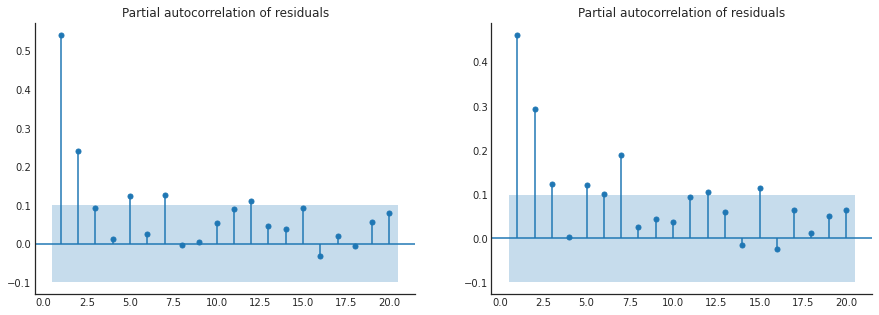

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
linear_regression.residuals_autocorrelation(model_linear, ax=ax1);
linear_regression.residuals_autocorrelation(model_quad, ax=ax2);

#### 3. Non-constant Variance of Error Terms

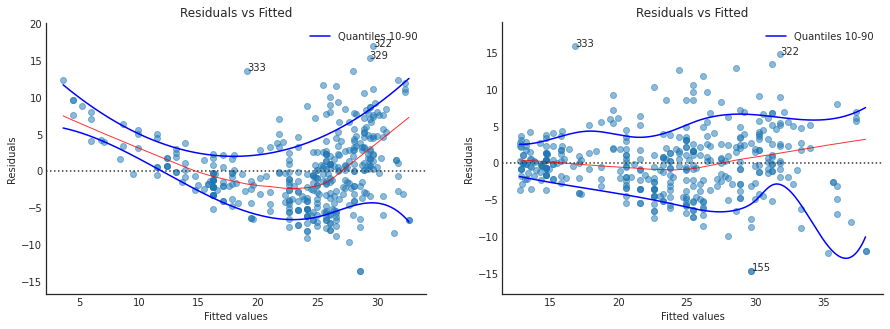

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
linear_regression.residuals_vs_fitted(model_linear, ax=ax1, show_quantiles=True)
linear_regression.residuals_vs_fitted(model_quad, ax=ax2, show_quantiles=True)

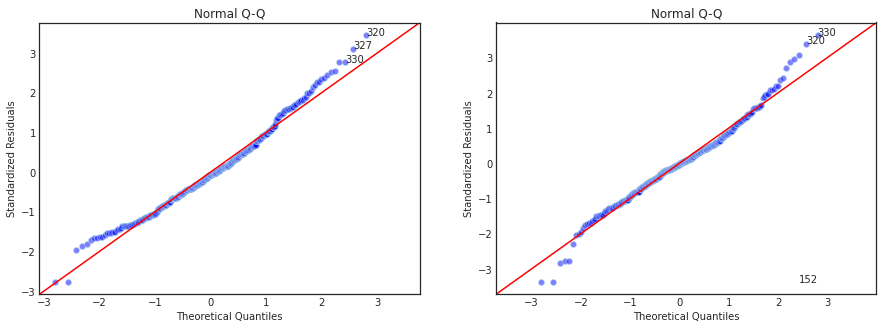

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
linear_regression.residuals_normality(model_linear, ax1)
linear_regression.residuals_normality(model_quad, ax2)

#### 4. Outliers

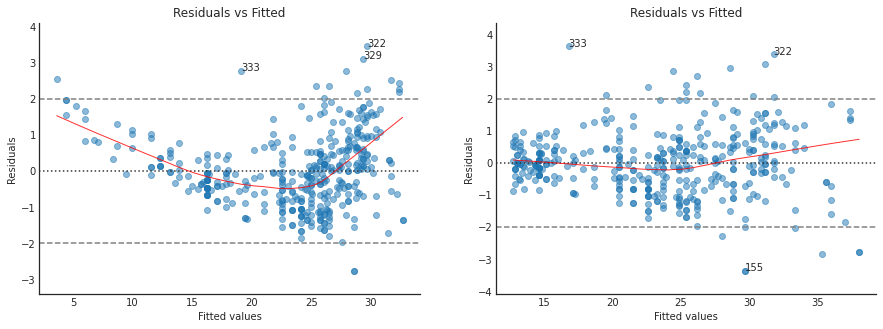

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
linear_regression.residuals_vs_fitted(model_linear, ax=ax1, studentized=True)
linear_regression.residuals_vs_fitted(model_quad, ax=ax2, studentized=True)

#### 5. High Leverage Points

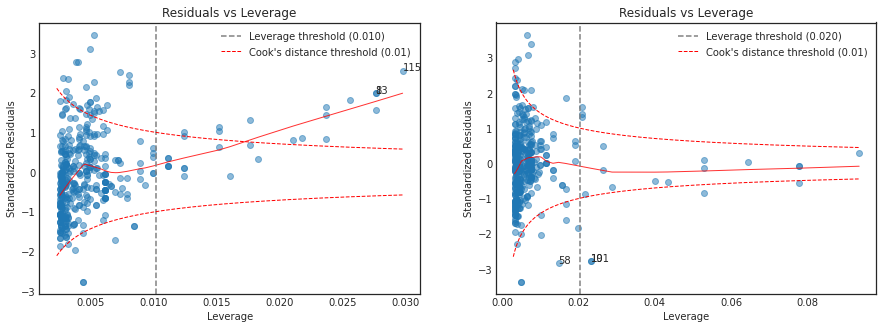

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
linear_regression.leverage(model_linear, ax1)
linear_regression.leverage(model_quad, ax2)

#### 6. Collinearity

<AxesSubplot:xlabel='Limit', ylabel='Rating'>

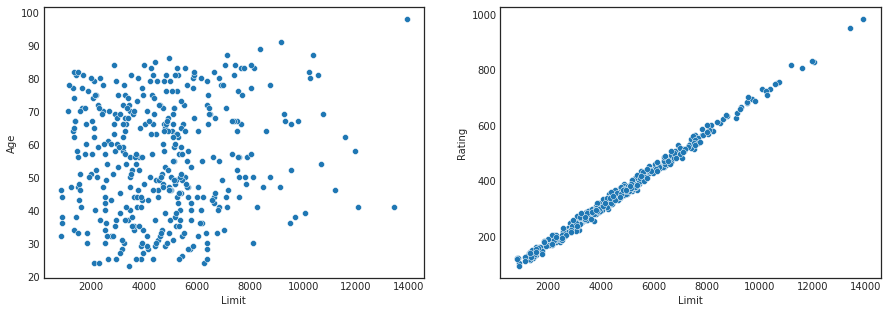

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(data=credit, x="Limit", y="Age", ax=ax1)
sns.scatterplot(data=credit, x="Limit", y="Rating", ax=ax2)

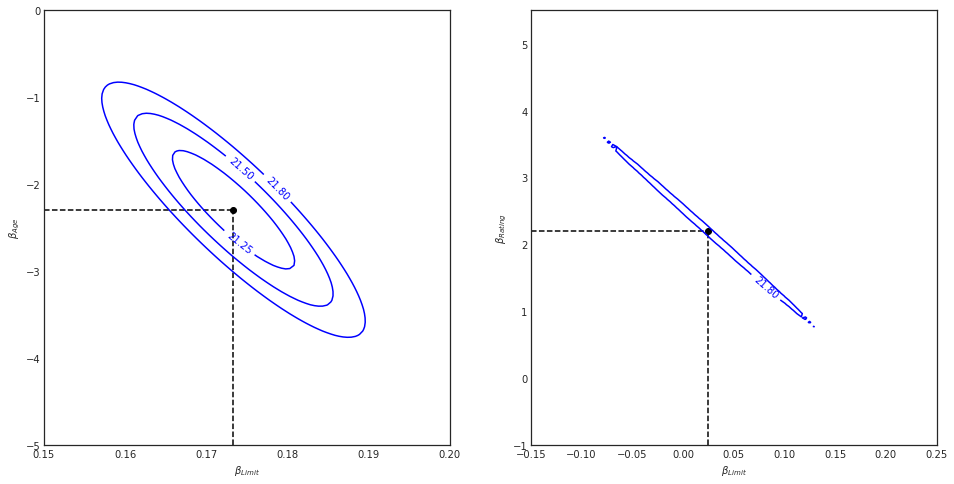

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
model = smf.ols("Balance ~ Limit + Age", data=credit).fit()
linear_regression.rss_contour(model, (0.15, 0.2), (-5, 0), ax1, [21.25, 21.5, 21.8])
model = smf.ols("Balance ~ Limit + Rating", data=credit).fit()
linear_regression.rss_contour(model, (-0.15, 0.25), (-1, 5.5), ax2, [21.25, 21.8])

In [38]:
def model_summary(model):
    results_df = pd.DataFrame({
        "Coefficient": model.params.round(3),
        "Std. error": model.bse.round(3),
        "t-statistic": model.tvalues.round(3),
        "p-value": model.pvalues.round(4),
    }, index=model.model.exog_names)
    results_df.index.rename("name", inplace=True)
    return results_df

In [39]:
model_age = smf.ols("Balance ~ Age + Limit", data=credit).fit()
df_age = model_summary(model_age)
df_age["Model"] = "Model 1"

model_rating = smf.ols("Balance ~ Rating + Limit", data=credit).fit()
df_rating = model_summary(model_rating)
df_rating["Model"] = "Model 2"

pd.concat([df_age, df_rating]).reset_index().set_index(["Model", "name"])

Coefficient  Std. error  t-statistic  p-value
Model   name                                                    
Model 1 Intercept     -173.411      43.828       -3.957   0.0001
        Age             -2.291       0.672       -3.407   0.0007
        Limit            0.173       0.005       34.496   0.0000
Model 2 Intercept     -377.537      45.254       -8.343   0.0000
        Rating           2.202       0.952        2.312   0.0213
        Limit            0.025       0.064        0.384   0.7012

In [40]:
model = smf.ols("Balance ~ Age + Rating + Limit", data=credit).fit()
print(f"{model.rsquared:.3f}")
linear_regression.variance_inflation_factors(model).round(2)

0.754


Age         1.01
Rating    160.67
Limit     160.59
Name: VIF, dtype: float64

In [41]:
model = smf.ols("Balance ~ Age + Limit", data=credit).fit()
print(f"{model.rsquared:.3f}")
linear_regression.variance_inflation_factors(model).round(2)

0.750


Age      1.01
Limit    1.01
Name: VIF, dtype: float64

In [42]:
credit["Credit_worthiness"] = (credit["Rating"]/credit["Rating"].std() + credit["Limit"]/credit["Limit"].std())/2

In [43]:
model = smf.ols("Balance ~ Age + Credit_worthiness", data=credit).fit()
print(f"{model.rsquared:.3f}")
linear_regression.variance_inflation_factors(model).round(2)

0.753


Age                  1.01
Credit_worthiness    1.01
Name: VIF, dtype: float64

## 3.5 Comparison of Linear Regression with K-Nearest Neighbors

In [44]:
N = 80
x = np.linspace(-1, 1, N)
a, b = 2, 2
y = a + b*x + stats.norm(0, 0.4).rvs(N)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

data_train_linear = pd.DataFrame({"x": x_train, "y": y_train})
data_test_linear = pd.DataFrame({"x": x_test, "y": y_test})

x_dense = np.linspace(-1, 1, 1000)
y_linear = a + b*x_dense
data_dense_linear = pd.DataFrame({"x": x_dense, "y": y_linear})

In [45]:
knn1 = KNeighborsRegressor(n_neighbors=1)
knn9 = KNeighborsRegressor(n_neighbors=9)
data_dense_linear["y_knn_1"] = (
    knn1
    .fit(data_train_linear.x.values.reshape(-1, 1), data_train_linear.y)
    .predict(data_dense_linear.x.values.reshape(-1, 1))
)
data_dense_linear["y_knn_9"] = (
    knn9
    .fit(data_train_linear.x.values.reshape(-1, 1), data_train_linear.y)
    .predict(data_dense_linear.x.values.reshape(-1, 1))
)

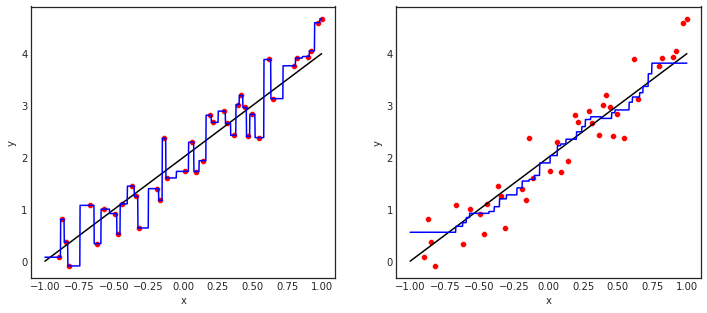

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(data=data_train_linear, x="x", y="y", color="red", ax=ax1)
sns.lineplot(data=data_dense_linear, x="x", y="y", color="black", ax=ax1)
sns.lineplot(data=data_dense_linear, x="x", y="y_knn_1", color="blue", ax=ax1);

sns.scatterplot(data=data_train_linear, x="x", y="y", color="red", ax=ax2)
sns.lineplot(data=data_dense_linear, x="x", y="y", color="black", ax=ax2)
sns.lineplot(data=data_dense_linear, x="x", y="y_knn_9", color="blue", ax=ax2);

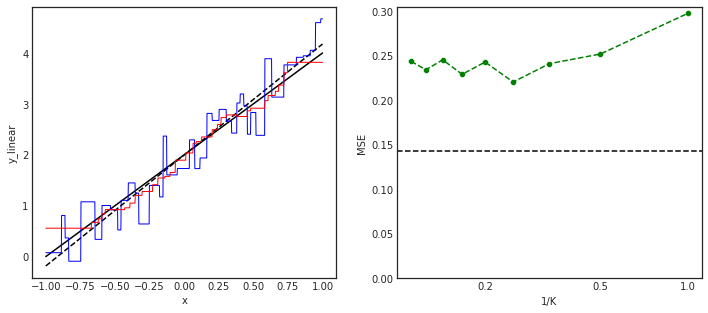

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
linear_regression.compare_linear_knn(data_train_linear, data_test_linear, data_dense_linear, ax1)
linear_regression.linear_knn_mse_one_var(data_train_linear, data_test_linear, ax2)

In [48]:
N = 100
x = np.linspace(-1, 1, N)
a, b, c = 0.5, 3, 3.5
y = a + b/(1+np.exp(-c*x)) + stats.norm(0, 0.2).rvs(N)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

data_train_semi_linear = pd.DataFrame({"x": x_train, "y": y_train})
data_test_semi_linear = pd.DataFrame({"x": x_test, "y": y_test})

x_dense = np.linspace(-1, 1, 1000)
y_semi_linear = a + b/(1+np.exp(-c*x_dense))
data_dense_semi_linear = pd.DataFrame({"x": x_dense, "y": y_semi_linear})

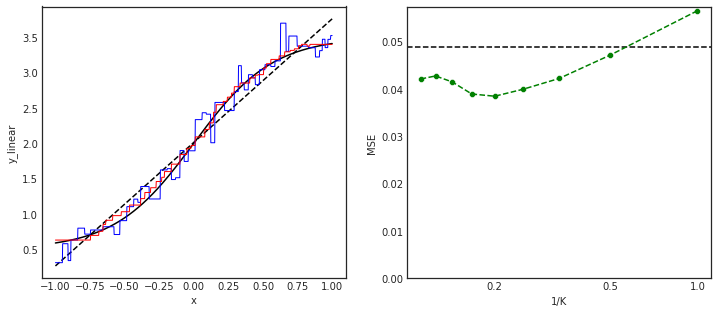

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
linear_regression.compare_linear_knn(data_train_semi_linear, data_test_semi_linear, data_dense_semi_linear, ax1)
linear_regression.linear_knn_mse_one_var(data_train_semi_linear, data_test_semi_linear, ax2)

In [50]:
N = 100
x = np.linspace(-1, 1, N)
a, b, c = 0.5, 3, 10
y = a + b/(1+np.exp(-c*x)) + stats.norm(0, 0.3).rvs(N)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

data_train_not_linear = pd.DataFrame({"x": x_train, "y": y_train})
data_test_not_linear = pd.DataFrame({"x": x_test, "y": y_test})

x_dense = np.linspace(-1, 1, 1000)
y_not_linear = a + b/(1+np.exp(-c*x_dense))
data_dense_not_linear = pd.DataFrame({"x": x_dense, "y": y_not_linear})

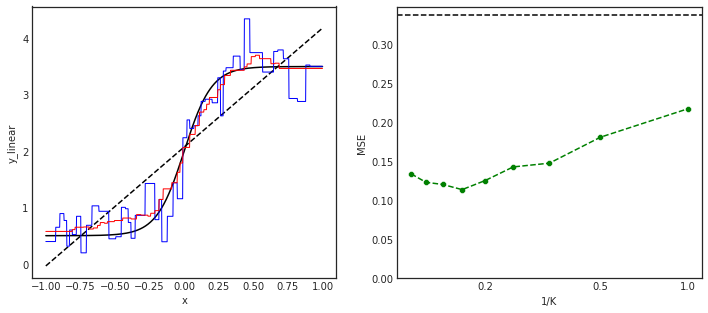

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
linear_regression.compare_linear_knn(data_train_not_linear, data_test_not_linear, data_dense_not_linear, ax1)
linear_regression.linear_knn_mse_one_var(data_train_not_linear, data_test_not_linear, ax2)

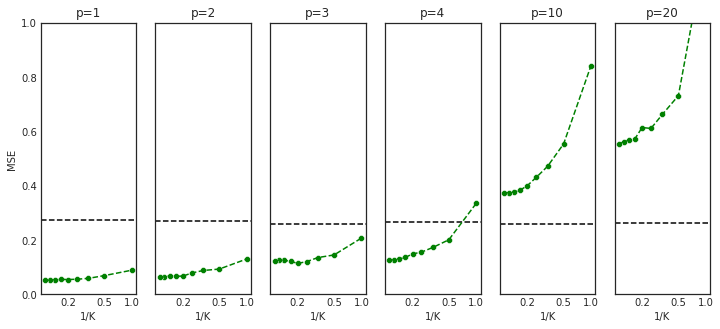

In [52]:
fig, axs = plt.subplots(1, 6, figsize=(12,5))

N = 1000
x = np.linspace(-1, 1, N)
a, b, c = 0.5, 3, 10
y = a + b/(1+np.exp(-c*x)) + stats.norm(0, 0.2).rvs(N)
    
for i, (ax, p) in enumerate(zip(axs, [1, 2, 3, 4, 10, 20])):    
    x_random = stats.norm(0, 0.5).rvs((N, p))
    
    x_multi = np.concatenate([x.reshape(-1, 1), x_random], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x_multi, y, test_size=0.5)
    
    linear_regression.linear_knn_mse(x_train, y_train, x_test, y_test, ax)
    
    ax.set_ylim((0, 1))
    ax.set_title(f"p={p}")
    if i >= 1:
        ax.set_ylabel("")
        ax.set_yticklabels([])


## 3.6 Lab: Linear Regression

### 3.6.2 Simple Linear Regression

In [53]:
boston = pd.read_csv('Data/Boston.csv', index_col=0)
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [54]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [55]:
model = smf.ols("medv ~ lstat", data=boston).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           5.08e-88
Time:                        00:07:15   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
model.predict(exog=dict(lstat=[5, 10, 15]))

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [58]:
# mean_ci_xxx is the confidence interval, obs_ci_xxx is the prediction one
model.get_prediction(exog=dict(lstat=[5, 10, 15])).summary_frame().round(2)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.80,0.41,29.01,30.60,17.57,42.04
1,25.05,0.29,24.47,25.63,12.83,37.28
2,20.30,0.29,19.73,20.87,8.08,32.53


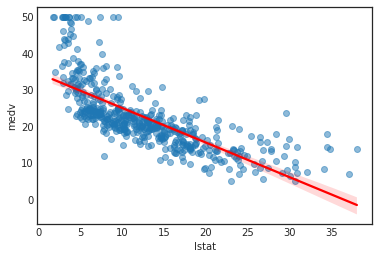

In [59]:
sns.regplot(data=boston, y="medv", x="lstat", ci=95, line_kws=dict(color="red"), scatter_kws=dict(alpha=0.5));

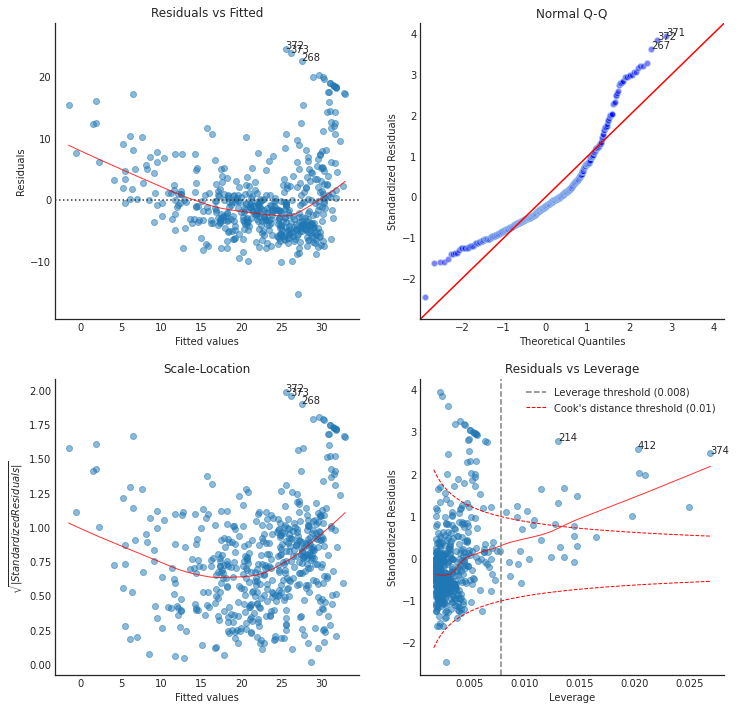

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

linear_regression.residuals_vs_fitted(model, ax=axs[0][0])
linear_regression.residuals_normality(model, ax=axs[0][1])
linear_regression.scale_location(model, ax=axs[1][0])
linear_regression.leverage(model, ax=axs[1][1])

### 3.6.3 Multiple Linear Regression

In [61]:
model = smf.ols("medv ~ lstat + age", data=boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           2.98e-88
Time:                        00:07:16   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model = smf.ols("medv ~ " + " + ".join(boston.columns.difference(["medv"])), data=boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          2.23e-133
Time:                        00:07:16   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.000      31.919      51.316
age            0.0036      0.013      0.271      0.787      -0.023       0.030
chas           2.8400      0.870      3.264      0.001       1.131       4.549
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
rad            0.2894      0.067      4.325      0.000       0.158       0.421
rm             3.6581      0.420      8.705      0.000       2.832       4.484
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
zn             0.0470      0.014      3.384      0.001       0.020       0.074
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
linear_regression.variance_inflation_factors(model).to_frame().transpose().round(2)

,age,chas,crim,dis,indus,lstat,nox,ptratio,rad,rm,tax,zn
VIF,3.09,1.07,1.77,3.95,3.99,2.87,4.37,1.8,7.45,1.91,9.0,2.3


In [64]:
model = smf.ols("medv ~ " + " + ".join(boston.columns.difference(["medv", "age"])), data=boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          2.03e-134
Time:                        00:07:17   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5251      4.920      8.441      0.000      31.859      51.191
chas           2.8528      0.868      3.287      0.001       1.148       4.558
crim          -0.1214      0.033     -3.683      0.000      -0.186      -0.057
dis           -1.5068      0.193     -7.825      0.000      -1.885      -1.128
indus          0.0135      0.062      0.217      0.829      -0.109       0.135
lstat         -0.5474      0.048    -11.483      0.000      -0.641      -0.454
nox          -18.4851      3.714     -4.978      0.000     -25.782     -11.188
ptratio       -0.9346      0.132     -7.099      0.000      -1.193      -0.676
rad            0.2879      0.067      4.322      0.000       0.157       0.419
rm             3.6811      0.411      8.951      0.000       2.873       4.489
tax           -0.0127      0.004     -3.333      0.001      -0.020      -0.005
zn             0.0465      0.014      3.379      0.001       0.019       0.074
==============================================================================
Omnibus:                      172.506   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.941
Skew:                           1.485   Prob(JB):                    3.81e-158
Kurtosis:                       8.056   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.6.4 Interaction Terms

In [65]:
smf.ols("medv ~ lstat * age", data=boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           4.86e-88
Time:                        00:07:17   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.6.5 Non-linear Transformations of the Predictors

In [66]:
smf.ols("medv ~ lstat +  I(lstat**2)", data=boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          1.56e-112
Time:                        00:07:17   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
model_1 = smf.ols("medv ~ lstat", data=boston).fit()
model_2 = smf.ols("medv ~ lstat +  I(lstat**2)", data=boston).fit()
sm.stats.anova_lm(model_1, model_2).round(0)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.0,0.0,NaN,NaN,NaN
1,503.0,15347.0,1.0,4125.0,135.0,0.0


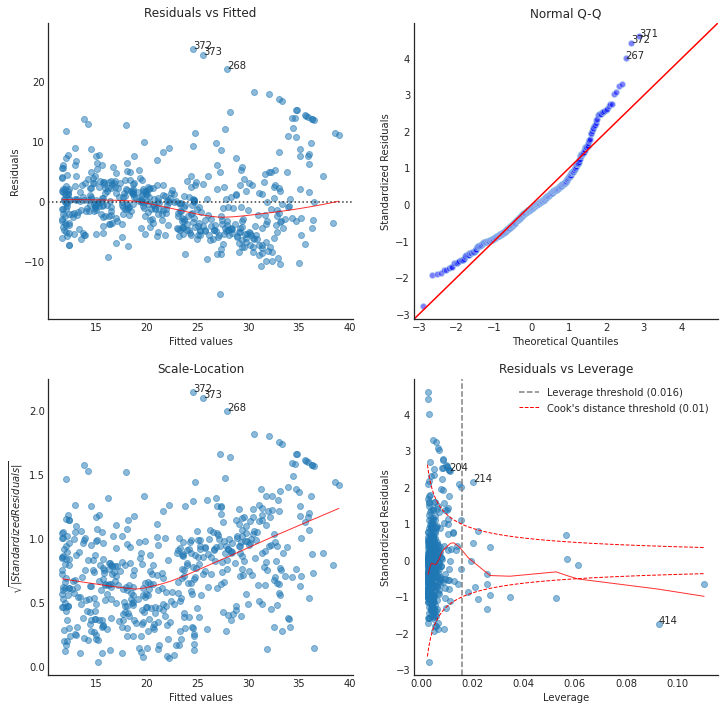

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

linear_regression.residuals_vs_fitted(model_2, ax=axs[0][0])
linear_regression.residuals_normality(model_2, ax=axs[0][1])
linear_regression.scale_location(model_2, ax=axs[1][0])
linear_regression.leverage(model_2, ax=axs[1][1])

In [69]:
def poly(var, degree):
    return " + ".join(f"np.power({var}, {i})" for i in range(1, degree+1))

In [70]:
# this is equivalent to the raw=TRUE option of R's poly
smf.ols("medv ~ " + poly("lstat", 5), data=boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          8.73e-122
Time:                        00:07:18   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
np.power(lstat, 1)   -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(lstat, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(lstat, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(lstat, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(lstat, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.6.6 Qualitative Predictors

In [71]:
carseats = pd.read_csv('Data/Carseats.csv')
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [72]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [73]:
"Sales ∼ " + " + ".join(carseats.columns.difference(["Sales"])) + " + Income:Advertising + Price:Age"

'Sales ∼ Advertising + Age + CompPrice + Education + Income + Population + Price + ShelveLoc + US + Urban + Income:Advertising + Price:Age'

In [74]:
"Sales ∼ " + " + ".join(carseats.columns.difference(["Sales"]))

'Sales ∼ Advertising + Age + CompPrice + Education + Income + Population + Price + ShelveLoc + US + Urban'

In [75]:
smf.ols("Sales ~ " + " + ".join(carseats.columns.difference(["Sales"])) + " + Income:Advertising + Price:Age", data=carseats).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          6.14e-166
Time:                        00:07:18   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
import patsy

levels = ["Bad", "Good", "Medium"]
contrast = patsy.contrasts.Treatment(reference="Bad").code_without_intercept(levels)
pd.DataFrame(contrast.matrix, columns=contrast.column_suffixes, index=levels)

,[T.Good],[T.Medium]
Bad,0.0,0.0
Good,1.0,0.0
Medium,0.0,1.0
